#### Data Description

* `age`: Age Of individual
* `workclass`: Working Class (`Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked`)
* `fnlwgt`: Random continuous Variable
* `education`: Level Of Education (`Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool`)
* `education_num`: Number of educational years completed
* `marital_status`: Marital Status (`Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.`)
* `occupation`: Work Occupation (`Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces`)
* `relationship`: Relaionship Status(`Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried`)
* `race`: Race of Individual (`White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.`)
* `sex`: Sex of Individual (`Female, Male.`)
* `capital_gain`: Monetary Capital Gain
* `capital_loss`: Monetary Capital Loss
* `hours_per_week`: Average hourse Individual Works 
* `native_country`: Country Individual Belongs to (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.`)

**Importing Necessary Libraries**

In [0]:
from pyspark.sql import Row
from pyspark import SQLContext
sqlContext = SQLContext(sc)
from pyspark.sql import functions as f

from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

from pyspark.ml.classification import DecisionTreeClassifier, GBTClassifier, RandomForestClassifier, LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator,MulticlassClassificationEvaluator


**Reading Data**

In [0]:
data = spark.read.csv("dbfs:/FileStore/shared_uploads/avinash.yadav@praxis.ac.in/adult.csv", header=False, inferSchema=True, ignoreLeadingWhiteSpace=True)

**Data Size**

In [0]:
data.count()

Out[302]: 32561

**Initialising column names for header**

In [0]:
col_names = ["age", "workclass", "fnlwgt", "education", 
             "education-num", "marital-status", "occupation", 
             "relationship", "race", "sex", "capital-gain", 
             "capital-loss", "hours-per-week", "native-country", 
             "earnings"]

In [0]:
#Changing Columns name by the Names is col_names and dropping any Null observations
data= data.select([f.col(old).alias(new) for old, new in zip(data.columns, col_names)])
data= data.drop('fnlwgt')
data=data.dropna("any")

**Displaying data**

In [0]:
display(data)

age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings
39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [0]:
data.count()

Out[306]: 32561

Since there is no change is number of observations after dropping null values , we can conclude there is null observations in the data

**Count of Target Variable**
<br>We can see that dataset is imbalanced

In [0]:
data.groupby('earnings').count().show()

+--------+-----+
earnings|count|
+--------+-----+
 <=50K|24720|
 >50K| 7841|
+--------+-----+

**Displaying Dataset's Schema**

In [0]:
data.printSchema()

root
-- age: integer (nullable = true)
-- workclass: string (nullable = true)
-- education: string (nullable = true)
-- education-num: integer (nullable = true)
-- marital-status: string (nullable = true)
-- occupation: string (nullable = true)
-- relationship: string (nullable = true)
-- race: string (nullable = true)
-- sex: string (nullable = true)
-- capital-gain: integer (nullable = true)
-- capital-loss: integer (nullable = true)
-- hours-per-week: integer (nullable = true)
-- native-country: string (nullable = true)
-- earnings: string (nullable = true)

* **Changing target column elements : '0' for <=50K and '1' for >50K**

In [0]:
data = data.withColumn('income', f.when(data.earnings == '<=50K', 0).otherwise(1))
# Drop the Income label
data = data.drop('earnings')
# Show dataset's columns
data.columns

Out[309]: ['age',
 'workclass',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [0]:
display(data)

age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


# Exploratory Data Analysis

In [0]:
#Changing spark dataframe to Pandas DataFrame for plotting graph
dd=data.toPandas()

In [0]:
dd.head()

Out[345]:

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [0]:
#importing required libraries for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

* ### Univariate Analysis

* **Categorical Columns**

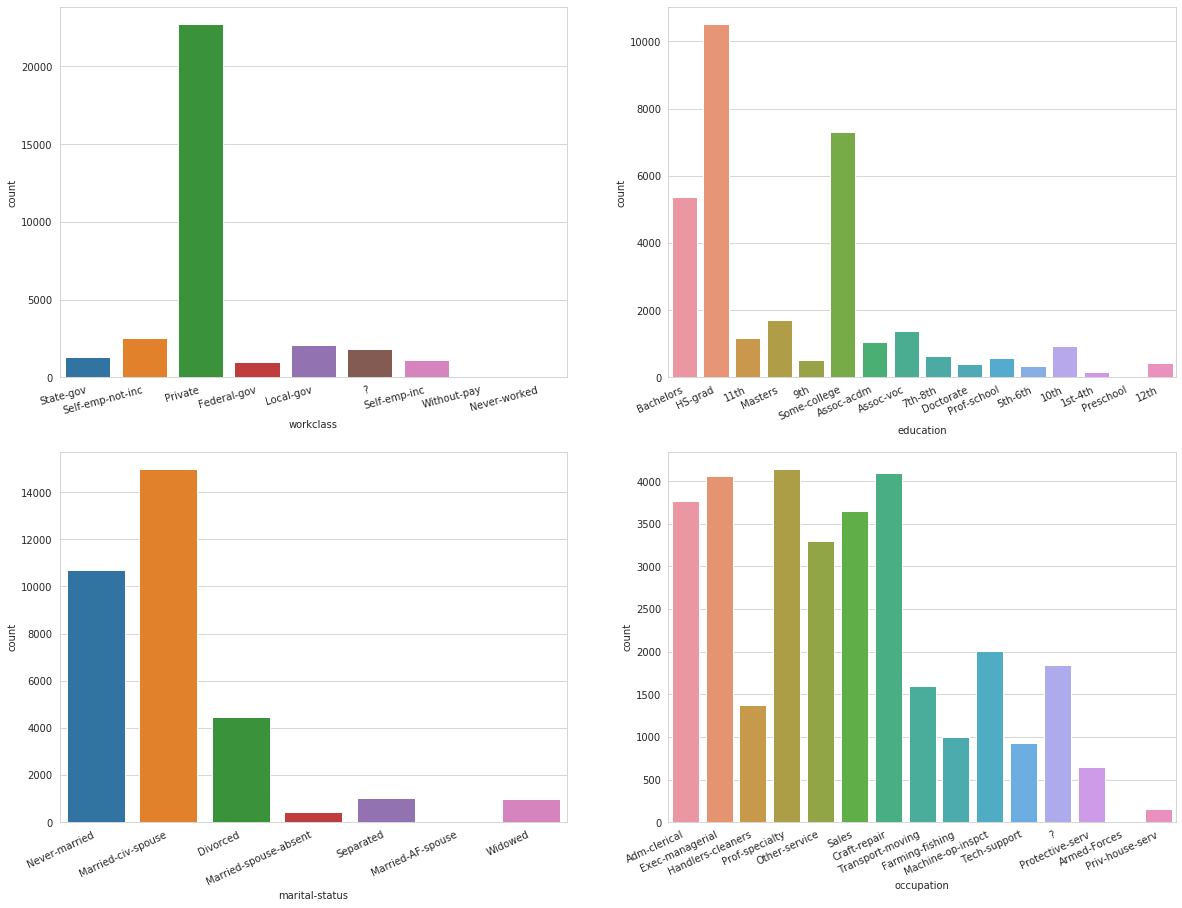

In [0]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,15)) 

#workclass
plt.subplot(221) 
sns.countplot(x='workclass',data=dd)
plt.xticks(rotation=15, horizontalalignment='right')
#education
plt.subplot(222) 
sns.countplot(x='education',data=dd) 
plt.xticks(rotation=25, horizontalalignment='right')
#marital-status
plt.subplot(223) 
sns.countplot(x='marital-status',data=dd)
plt.xticks(rotation=25, horizontalalignment='right')
#Occupation
plt.subplot(224) 
sns.countplot(x='occupation',data=dd)
plt.xticks(rotation=25, horizontalalignment='right')
plt.show()

###### Observation
* We can see Most people work in Private Industry 
* Most of the people have High School Graduation
* Married-civ-Spouse is highest
* Exec-manager , Professional Speciality, Craft-Repait are almost same

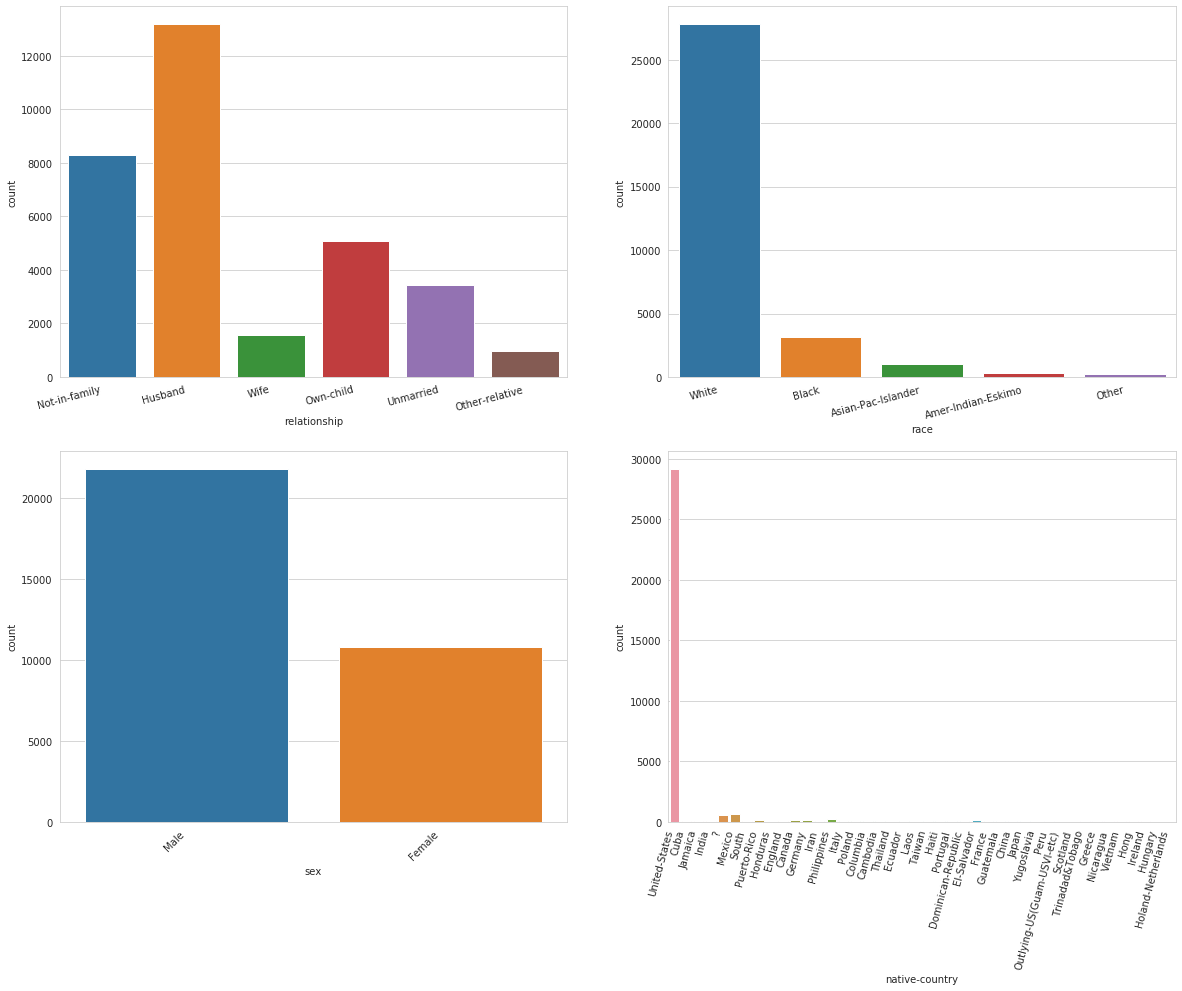

In [0]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,15)) 
#relationship
plt.subplot(221) 
sns.countplot(x='relationship',data=dd)
plt.xticks(rotation=15, horizontalalignment='right')
#race
plt.subplot(222) 
sns.countplot(x='race',data=dd)
plt.xticks(rotation=15, horizontalalignment='right')
#sex
plt.subplot(223) 
sns.countplot(x='sex',data=dd)
plt.xticks(rotation=45, horizontalalignment='right')
#native-country
plt.subplot(224) 
sns.countplot(x='native-country',data=dd)
plt.xticks(rotation=75, horizontalalignment='right')
plt.show()

Observation :
Only thing that is worth noting here is most the people have their native country USA

* **Numerical Variables**

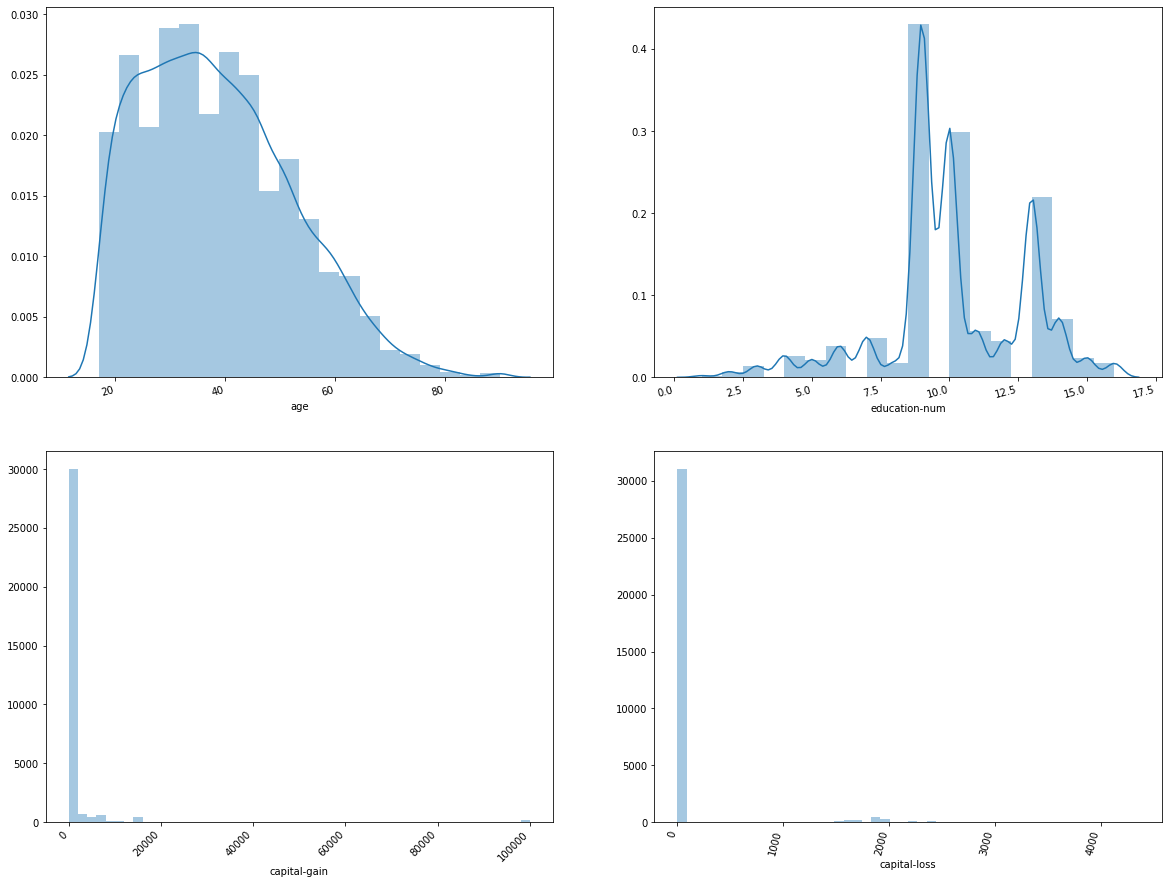

In [0]:
plt.figure(figsize=(20,15)) 
#age
plt.subplot(221) 
sns.distplot(dd['age'],bins=20)
plt.xticks(rotation=15, horizontalalignment='right')
#education-num
plt.subplot(222) 
sns.distplot(dd['education-num'],bins=20)
plt.xticks(rotation=15, horizontalalignment='right')
#capital-gain
plt.subplot(223) 
sns.distplot(dd['capital-gain'],kde=False)
plt.xticks(rotation=45, horizontalalignment='right')
#capital-loss
plt.subplot(224) 
sns.distplot(dd['capital-loss'],kde=False)
plt.xticks(rotation=75, horizontalalignment='right')
plt.show()

* ### Bivariate Analysis

* **Categorical Columns**

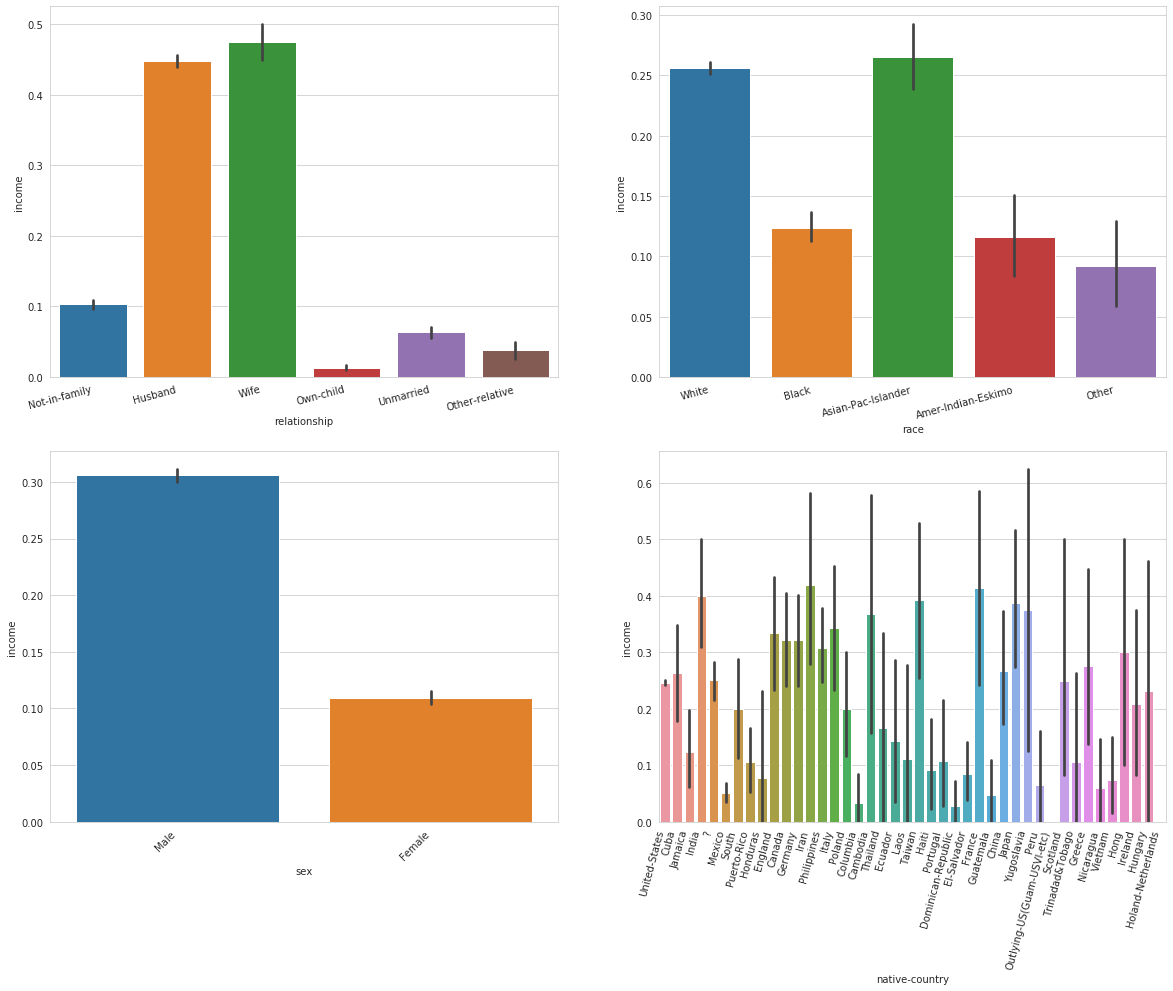

In [0]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,15)) 
#relationship
plt.subplot(221) 
sns.barplot(x='relationship',y='income',data=dd)
plt.xticks(rotation=15, horizontalalignment='right')
#race
plt.subplot(222) 
sns.barplot(x='race',y='income',data=dd)
plt.xticks(rotation=15, horizontalalignment='right')
#sex
plt.subplot(223) 
sns.barplot(x='sex',y='income',data=dd)
plt.xticks(rotation=45, horizontalalignment='right')
#native-country
plt.subplot(224) 
sns.barplot(x='native-country',y='income',data=dd)
plt.xticks(rotation=75, horizontalalignment='right')
plt.show()

###### Observations
* Wife or Husband are more towards higher income i.e. greater 50K
* Not much can be inferred from Race 
* Male have higher tendency to earn more(this is more likely to be biased as there are more males count in the data)
* Graph shows that Iran and gautemala have more count of people with higher income but that is with very high variance(shown by line on the bar), But United states shows that people their have low variance that is more or less the count for >50K and <=50K is same

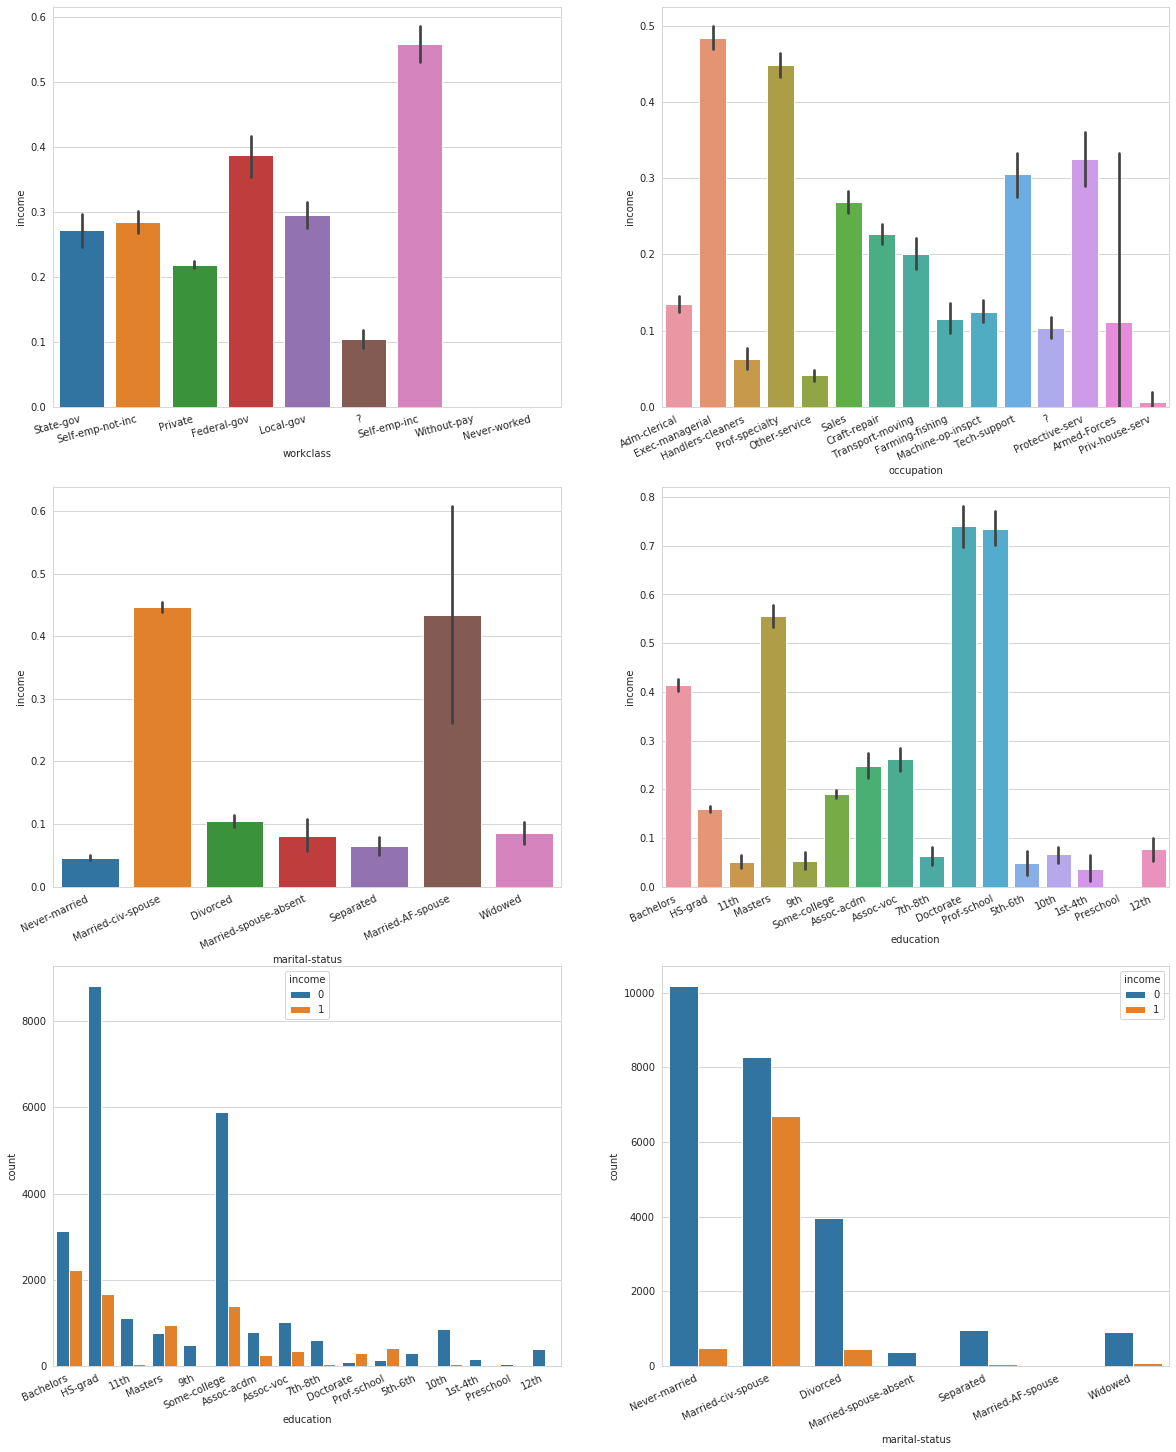

In [0]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,25)) 
#workclass
plt.subplot(321) 
sns.barplot(x='workclass',y='income',data=dd)
plt.xticks(rotation=15, horizontalalignment='right')
#education
plt.subplot(322) 
sns.barplot(x='occupation',y='income',data=dd)
plt.xticks(rotation=25, horizontalalignment='right')
#marital-status
plt.subplot(323) 
sns.barplot(x='marital-status',y='income',data=dd)
plt.xticks(rotation=25, horizontalalignment='right')
#Occupation
plt.subplot(324) 
sns.barplot(x='education',y='income',data=dd)
plt.xticks(rotation=25, horizontalalignment='right')
plt.subplot(325) 
sns.countplot(x='education',hue='income',data=dd)
plt.xticks(rotation=25, horizontalalignment='right')
#marital-status
plt.subplot(326) 
sns.countplot(x='marital-status',hue='income',data=dd)
plt.xticks(rotation=25, horizontalalignment='right')
plt.show()

###### Observations :
* Self-emp-Inc have more count in income
* Doctorate and Professional school have more income that too with less variance shows that people with higher education or professional skills are more likely to earn >50K
* As inferred from relationship Variable here in Marital-status too Married with spouse are most likely to earn more
* In Occupation it can be seen that people on executive post or with professional skills are most likely to earn more

* **Numerical Columns**

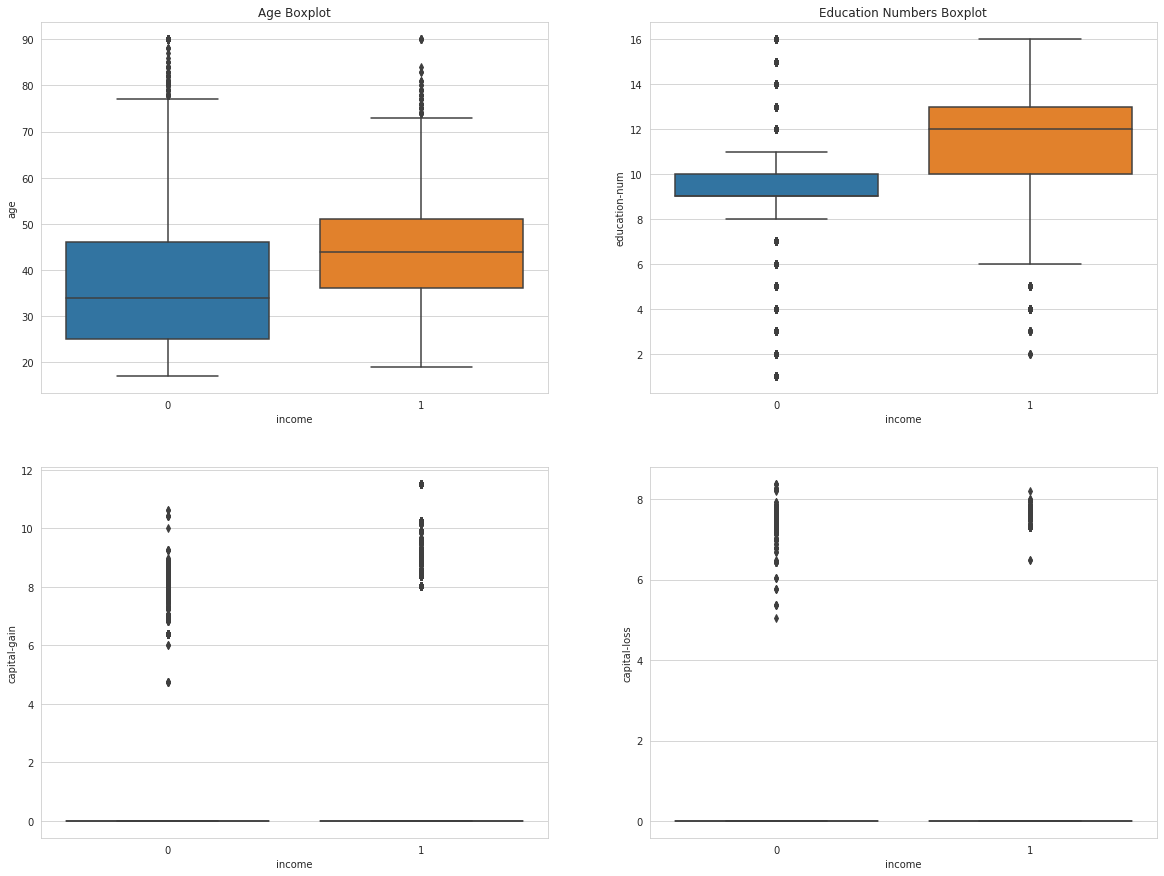

In [0]:
import numpy as np
sns.set_style('whitegrid')
plt.figure(figsize=(20,15)) 
#workclass
plt.subplot(221) 
sns.boxplot(x='income',y='age',data=dd)
plt.title('Age Boxplot')
#education
plt.subplot(222) 
sns.boxplot(x='income',y='education-num',data=dd)
plt.title('Education Numbers Boxplot')
dd['capital-gain'] = dd['capital-gain'].apply(lambda x: np.log(x + 1))
dd['capital-loss'] = dd['capital-loss'].apply(lambda x: np.log(x + 1))
plt.subplot(223) 
sns.boxplot(x='income',y='capital-gain',data=dd)
#Occupation
plt.subplot(224) 
sns.boxplot(x='income',y='capital-loss',data=dd)
plt.show()

## Data Preprocessing

In [0]:
# Selecting categorical features
categorical_columns = [ 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week', 'native-country', ]

**Vectorizing Numerical Features and One-Hot Encoding Categorical Features**<br>In order to One-Hot encode the categorical features we will first pass them through an indexer and then to an encoder.

In [0]:
# The index of string values multiple columns
indexers = [StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c))  for c in categorical_columns]

# The encode of indexed values multiple columns
encoders = [OneHotEncoder(dropLast=False,inputCol=indexer.getOutputCol(), outputCol="{0}_encoded".format(indexer.getOutputCol())) for indexer in indexers]

**Joining the categorical encoded features with the numerical ones and making a vector with both of them.**

In [0]:
# Vectorizing encoded values
categorical_encoded = [encoder.getOutputCol() for encoder in encoders]

numerical_columns = ['age', 'education-num', 'capital-gain', 'capital-loss']
inputcols = categorical_encoded + numerical_columns
#assembling and making a vector
assembler = VectorAssembler(inputCols=inputcols, outputCol="features")

**Setting up a pipeline to automatize the stages**

In [0]:
pipeline = Pipeline(stages=indexers + encoders + [assembler] )
model = pipeline.fit(data)

# Transform data
tform_data = model.transform(data)
display(tform_data)

age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_indexed,education_indexed,marital-status_indexed,occupation_indexed,relationship_indexed,race_indexed,sex_indexed,hours-per-week_indexed,native-country_indexed,workclass_indexed_encoded,education_indexed_encoded,marital-status_indexed_encoded,occupation_indexed_encoded,relationship_indexed_encoded,race_indexed_encoded,sex_indexed_encoded,hours-per-week_indexed_encoded,native-country_indexed_encoded,features
39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,4.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 9, indices -> List(4), values -> List(1.0))","Map(vectorType -> sparse, length -> 16, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 7, indices -> List(1), values -> List(1.0))","Map(vectorType -> sparse, length -> 15, indices -> List(3), values -> List(1.0))","Map(vectorType -> sparse, length -> 6, indices -> List(1), values -> List(1.0))","Map(vectorType -> sparse, length -> 5, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 94, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 42, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 200, indices -> List(4, 11, 26, 35, 48, 53, 58, 60, 154, 196, 197, 198), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 39.0, 13.0, 2174.0))"
50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,57.0,0.0,"Map(vectorType -> sparse, length -> 9, indices -> List(1), values -> List(1.0))","Map(vectorType -> sparse, length -> 16, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 7, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 15, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 6, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 5, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 94, indices -> List(57), values -> List(1.0))","Map(vectorType -> sparse, length -> 42, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 200, indices -> List(1, 11, 25, 34, 47, 53, 58, 117, 154, 196, 197), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 50.0, 13.0))"
38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0.0,0.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 9, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 16, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 7, indices -> List(2), values -> List(1.0))","Map(vectorType -> sparse, length -> 15, indices -> List(9), values -> List(1.0))","Map(vectorType -> sparse, length -> 6, indices -> List(1), values -> List(1.0))","Map(vectorType -> sparse, length -> 5, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 94, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 42, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 200, indices -> List(0, 9, 27, 41, 48, 53, 58, 60, 154, 196, 197), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 38.0, 9.0))"
53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0.0,5.0,0.0,9.0,0.0,1.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 9, indices -> List(0), values -> List(1.0))","Map(vectorType -> s

**Finally select a dataset only with the relevant features.**

In [0]:
# Transform data
final_data = tform_data.select('features', 'income')

### Scaling Data

In [0]:
from pyspark.ml.feature import StandardScaler
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")
scaler = standardScaler.fit(final_data)
final_data_2 = scaler.transform(final_data)
final_data_2.take(2)

Out[394]: [Row(features=SparseVector(200, {4: 1.0, 11: 1.0, 26: 1.0, 35: 1.0, 48: 1.0, 53: 1.0, 58: 1.0, 60: 1.0, 154: 1.0, 196: 39.0, 197: 13.0, 198: 2174.0}), income=0, features_scaled=SparseVector(200, {4: 5.1114, 11: 2.6976, 26: 2.1298, 35: 3.1253, 48: 2.2941, 53: 2.8342, 58: 2.1254, 60: 2.0043, 154: 3.2739, 196: 2.8591, 197: 5.053, 198: 0.2944})),
 Row(features=SparseVector(200, {1: 1.0, 11: 1.0, 25: 1.0, 34: 1.0, 47: 1.0, 53: 1.0, 58: 1.0, 117: 1.0, 154: 1.0, 196: 50.0, 197: 13.0}), income=0, features_scaled=SparseVector(200, {1: 3.7281, 11: 2.6976, 25: 2.0064, 34: 3.025, 47: 2.0369, 53: 2.8342, 58: 2.1254, 117: 37.6384, 154: 3.2739, 196: 3.6656, 197: 5.053}))]

In [0]:
final_data_2.show(5)

+--------------------+------+--------------------+
 features|income| features_scaled|
+--------------------+------+--------------------+
(200,[4,11,26,35,...| 0|(200,[4,11,26,35,...|
(200,[1,11,25,34,...| 0|(200,[1,11,25,34,...|
(200,[0,9,27,41,4...| 0|(200,[0,9,27,41,4...|
(200,[0,14,25,41,...| 0|(200,[0,14,25,41,...|
(200,[0,11,25,32,...| 0|(200,[0,11,25,32,...|
+--------------------+------+--------------------+
only showing top 5 rows

## Building ML Models

* ### Initialising Models

Models used are:
* Decision Tree
* Random Forest
* Gradient Boost

In [0]:
# Initialize the classification models
dtc = DecisionTreeClassifier(labelCol='income', featuresCol='features')
rfc = RandomForestClassifier(numTrees=150, labelCol='income', featuresCol='features')
gbt = GBTClassifier(labelCol='income', featuresCol='features', maxIter=10)

**Splitting Data into train and test data**

In [0]:
train_data, test_data = final_data_2.randomSplit([0.8,0.2],2040)

In [0]:
display(train_data.groupby('income').count().show())


+------+-----+
income|count|
+------+-----+
 1| 6226|
 0|19677|
+------+-----+

In [0]:
test_data.groupby('income').count().show()

+------+-----+
income|count|
+------+-----+
 1| 1615|
 0| 5043|
+------+-----+

### Training Models

In [0]:
dtc_model = dtc.fit(train_data)
rfc_model = rfc.fit(train_data)
gbt_model = gbt.fit(train_data)

### Obtaining Predictions

In [0]:
dtc_preds = dtc_model.transform(test_data)
rfc_preds = rfc_model.transform(test_data)
gbt_preds = gbt_model.transform(test_data)

### Evaluating Models

Metrics Used are:
* Accuracy
* Area Under ROC curve : denoted as AUC
* Area Under PR curve : Precision Recall Curve

In [0]:
#building evaluation objects
my_eval = BinaryClassificationEvaluator(labelCol='income')
my_eval_acc=BinaryClassificationEvaluator(labelCol='income',metricName='areaUnderPR')
evaluatorMulti = MulticlassClassificationEvaluator(labelCol="income",metricName='accuracy')

**Storing all Evaluation results**

In [0]:
auc_dt , auPR_dt , acc_dt= my_eval.evaluate(dtc_preds) , my_eval_acc.evaluate(dtc_preds) ,evaluatorMulti.evaluate(dtc_preds)
auc_rf , auPR_rf , acc_rf= my_eval.evaluate(rfc_preds) , my_eval_acc.evaluate(rfc_preds) ,evaluatorMulti.evaluate(rfc_preds)
auc_gb , auPR_gb , acc_gb= my_eval.evaluate(gbt_preds) , my_eval_acc.evaluate(gbt_preds) ,evaluatorMulti.evaluate(gbt_preds)


**Creating a dataframe with ModelName and respected Evaluation metrics**

In [0]:
tup = [('Decision Tree',auc_dt , auPR_dt, acc_dt),('Random Forest',auc_rf , auPR_rf ,acc_rf),('Gradient Boosting',auc_gb , auPR_gb ,acc_gb)]
eval_rdd = sc.parallelize(tup)
dum = eval_rdd.map(lambda x: Row(Model=x[0], AreaUnderROC=round(float(x[1]),4), AreaUnderPR=round(float(x[2]),4) , Accuracy=round(float(x[3]),4)*100))
evaluation_df = sqlContext.createDataFrame(dum)

In [0]:
evaluation_df.show()

+-----------------+------------+-----------+--------+
 Model|AreaUnderROC|AreaUnderPR|Accuracy|
+-----------------+------------+-----------+--------+
 Decision Tree| 0.6326| 0.3332| 84.23|
 Random Forest| 0.8919| 0.7408| 81.51|
Gradient Boosting| 0.9034| 0.7733| 84.7|
+-----------------+------------+-----------+--------+

**The best predictor is the Gradient Boosting Tree with Accuracy 85% and AreaUnderROC 0.90 which is already pretty good when display its predictions we will see the following:**

In [0]:
gbt_preds.show()

+--------------------+------+--------------------+--------------------+----------+
 features|income| rawPrediction| probability|prediction|
+--------------------+------+--------------------+--------------------+----------+
(200,[0,9,25,32,4...| 1|[0.59920723700438...|[0.76824260716136...| 0.0|
(200,[0,9,25,32,4...| 0|[0.50604184266229...|[0.73342773176635...| 0.0|
(200,[0,9,25,32,4...| 1|[-0.6159941892929...|[0.22583360246177...| 1.0|
(200,[0,9,25,32,4...| 0|[0.61661677867920...|[0.77438402129081...| 0.0|
(200,[0,9,25,32,4...| 0|[0.50660463414991...|[0.73364773834725...| 0.0|
(200,[0,9,25,32,4...| 1|[-0.6159941892929...|[0.22583360246177...| 1.0|
(200,[0,9,25,32,4...| 0|[0.40975484629878...|[0.69413225154453...| 0.0|
(200,[0,9,25,32,4...| 1|[-0.0287118326253...|[0.48564802724597...| 1.0|
(200,[0,9,25,32,4...| 1|[0.29542805546266...|[0.64356155317582...| 0.0|
(200,[0,9,25,32,4...| 1|[0.43046906699106...|[0.70285662014780...| 0.0|
(200,[0,9,25,32,4...| 1|[0.59920723700438...|[0.76824260716136...| 0.0|
(200,[0,9,25,32,4...| 0|[0.40975484629878...|[0.69413225154453...| 0.0|
(200,[0,9,25,32,4...| 0|[-0.6159941892929...|[0.22583360246177...| 1.0|
(200,[0,9,25,32,4...| 1|[0.29542805546266...|[0.64356155317582...| 0.0|
(200,[0,9,25,32,4...| 0|[0.29542805546266...|[0.64356155317582...| 0.0|
(200,[0,9,25,32,4...| 1|[0.50604184266229...|[0.73342773176635...| 0.0|
(200,[0,9,25,32,4...| 1|[0.74133291823179...|[0.81497490192920...| 0.0|
(200,[0,9,25,32,5...| 0|[0.29542805546266...|[0.64356155317582...| 0.0|
(200,[0,9,25,32,5...| 1|[0.59920723700438...|[0.76824260716136...| 0.0|
(200,[0,9,25,33,4...| 0|[0.79030322121656...|[0.82929038786845...| 0.0|
+--------------------+------+--------------------+--------------------+----------+
only showing top 20 rows

# Improving Models Performance

**Using Grid Search Cross Validation , trying to tune hyperparameter.**
<br>**The hyperparameters will tune are:**
* Max Depth
* Max Bins
* Max Iterations

In [0]:
# Importing library
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Set the Parameters grid
paramGrid = (ParamGridBuilder().addGrid(gbt.maxDepth, [2, 4, 6]).addGrid(gbt.maxBins, [20, 60]).addGrid(gbt.maxIter, [10, 20]).build())

# Iinitializing the cross validator class
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluatorMulti, numFolds=5)

**Training Model**

In [0]:
cvModel = cv.fit(train_data)

/databricks/spark/python/pyspark/ml/util.py:762: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)

In [0]:
gridSearch_predictions = cvModel.transform(test_data)

In [0]:
auc_gsgb , auPR_gsgb , acc_gsgb= my_eval.evaluate(gridSearch_predictions) , my_eval_acc.evaluate(gridSearch_predictions) ,evaluatorMulti.evaluate(gridSearch_predictions)

In [0]:
print('Accuracy of Model: ',acc_gsgb*100,'Area Under ROC Curve :',auc_gsgb,'Area Under PR :',auPR_gsgb)

Accuracy of Model: 85.86662661459897 Area Under ROC Curve : 0.9117667318030881 Area Under PR : 0.8012600517908607